In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
def knn_pt(pt, df, k):
    assert( len(pt)+1 == len(df.columns) )
    df1 = df.copy()
    df1['dist'] = 0 
    for i in range(len(pt)):
        df1['dist'] += (df1[df1.columns[i]] - pt[i])**2
    df1['dist'] = np.sqrt(df1['dist'])
    df2 = df1.sort_values(by='dist')
    df2 = df2[:k] 
    target = df2[df2.columns[-2]].value_counts().index[0]
    return target
def knn(predict, df, k, class_name='cls'):
    assert( len(predict.columns)+1 == len(df.columns) )
    def func1(pt):
        return knn_pt(pt, df, k)
    predict1 = predict.copy()
    predict1[class_name] = predict1.apply(func1, axis=1)
    return predict1

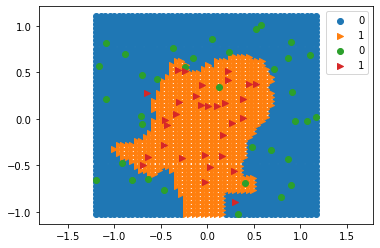

In [5]:
df=pd.read_csv('datasets/Muller_p122_circle.csv')
s=[]
while len(s)<2/3*len(df):
    a=np.random.randint(len(df))
    if a not in s:
        s.append(a)


cut = len(df)//3

train = df.iloc[cut:].copy()
test = df.iloc[:cut].copy()
x = np.linspace(train.x.min(), df.x.max(), 50)
y = np.linspace(train.y.min(), df.y.max(), 50)
xv, yv = np.meshgrid(x, y)
grid = np.vstack((xv.flatten(), yv.flatten())).T
predict = pd.DataFrame(grid, columns=['x','y'])

res = knn(predict, train, 3)
plt.scatter(res[res.cls==0].x, res[res.cls==0].y, label='0')
plt.scatter(res[res.cls==1].x, res[res.cls==1].y, label='1', marker='>')
plt.scatter(train[train.cls==0].x, train[train.cls==0].y, label='0')
plt.scatter(train[train.cls==1].x, train[train.cls==1].y, label='1', marker='>')
plt.axis('equal')
plt.legend()

In [53]:
predict = test.drop(columns='cls')
res = knn(predict, train, 3)
result=(test.cls == res.cls).value_counts()/len(test)
result

True     0.606061
False    0.393939
Name: cls, dtype: float64

In [8]:
df=pd.read_csv('datasets/Muller_p122_circle.csv')
s=[]
while len(s)<2/3*len(df):
    a=np.random.randint(len(df))
    if a not in s:
        s.append(a)
df.index in s

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()